In [13]:
import numpy as np

X = 2 * np.random.rand(100, 1) # training set
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3*X + Guassian noise

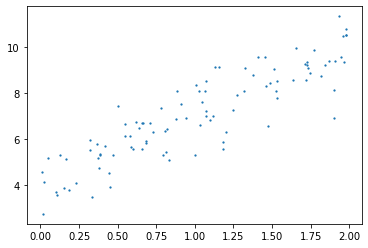

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=1.5)

In [15]:
X_full = np.c_[np.ones(X.shape), X]

add 1s to each instance of X so because x1 always equals 1 (x is the instance).

In [16]:
print(X_full[:3])

[[1.         0.91255807]
 [1.         0.63701151]
 [1.         0.44840144]]


In [17]:
theta_best = np.linalg.inv(np.transpose(X_full).dot(X_full)).dot(np.transpose(X_full)).dot(y)

In [18]:
print(theta_best)

[[4.08916618]
 [2.94343001]]


theta0 = 4.08, theta1 = 2.91. close to original parameters but the Guassian noise made it impossible to recover original value

In [19]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]
y_predict = X_new_b.dot(theta_best)

(0.0, 2.0, 0.0, 15.0)

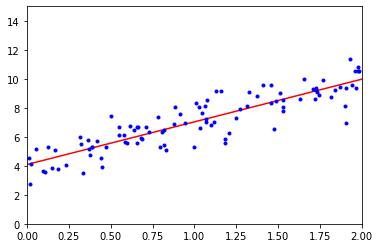

In [20]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

## Gradient Descent
- Feature scaling is required!

## Batch Gradient Descent
- uses the whole training set to return the gradient vector
- theta_next_step = theta - eta * gradients #eta is tolerance

In [45]:
import numpy as np

eta = 0.1 # set val for learning rate eta
n_iterations = 1000
m = 100 # no. of data pts.

theta = np.random.randn(2, 1) # return random val from standard normal distribution of shape(2, 1) (two rows, one col)
theta_v = [theta]
for i in range(n_iterations):
    gradients = (2/m)*X_full.T.dot(X_full.dot(theta) - y)
    theta -= gradients * eta
    theta_v.append(theta)
    
print(theta) # found the theta for y (the linear regression model) that minimizes RMSE

[[4.08916618]
 [2.94343001]]


### Finding the best value for learning rate eta

- use grid search, but limit the number of iterations (n_iterations above) to eliminate models that take too long
- set the number of iterations very large but set the algorithm to stop at a tiny number (tolerance) when the gradient vector becomes tiny
    - This is what happens when the GD has almost reached the minimum

### Convergence Rate
- Batch gradient descent on functions that are convex and with a slope that does not change abruptly will eventually converge to the minimum (optimal solution) with batch gradient descent
- It can take O(1/eta) iterations to reach the optimum
- Dividing the tolerance by some integer z will increase the runtime by approx. z times

## Stochastic Gradient Descent
- difference vs batch GD:
    - At every step, only uses one instance in the training set rather than the whole training set to compute the gradients
- The cost function will bounce up and down  (decreasing on average) to compute the parameters
    - the final parameter values are good but not optimal
    - This irregularity will help the cost function bounce out of local minima and get to the global minimum
- To give the algorithm (SGD) the ability to settle at the minimum, decrease the learning rate at each step - called simulated annealing

### Learning rate schedule
- the function that determines the learning rate at each step of SGD

In [99]:
n_epochs = 50
t0, t1 = 5, 50

theta = np.random.randn(2, 1) #shape == 2*1 for theta0, theta1

def learning_rate_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_full[random_index:random_index+1] # column syntaxreturns the original dimension of np arr
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_rate_schedule(epoch * m + i)
        theta -= gradients * eta

In [100]:
theta

array([[4.10526752],
       [2.95307842]])

## Mini Batch Gradient Descent
- Computes the gradients based on smal random sets of training instances called "mini-batches"
- Parameter space is less eratic than SGD so it will end up closer to the minimum than SGD
    - parameter space - the space of possible values that define a particular mathematical model
    - **might be harder to escape from local minimum because of its lower randomness**
        - not a concern for linear regression because its cost function is convex